In [45]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [46]:
def weighted_avg_and_std(avg, values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    variance = np.average((values - avg) ** 2, weights=weights)
    return math.sqrt(variance)


In [79]:
def calculate_weighted_average_std(df, a_bins):
    x = df.col1 #assuming the predictor variable is named as col1
    y = df.col2 #assuming the target variable is named as col2
    
    std_x = [] #list to store the weighted standard deviations for x-variable
    i=0
    for i in range(len(a_bins)-1): #iterate over bins
        low = df['col1'].values>=a_bins[i] 
        high = df['col1'].values<a_bins[i+1]
        b = df.loc[(low) & (high)] #floating dataframe to select the datavalues between the given range
        ave = b['col1'].mean() #average of the bin
        c = b.groupby('col2').count() #defining weight as number of data point of y present in the bin
        c = c.reset_index()
        if b.empty: #if b in empty append 0
            zero=0
            std_x.append(zero)
        else:
            s = weighted_avg_and_std(ave,c.col2,c.col1)
            std_x.append(s)
            

    std_y = [] #list to store the weighted standard deviations for y-variable
    i=0
    for i in range(len(a_bins)-1):
        low = df['col2'].values >= a_bins[i]
        high = df['col2'].values < a_bins[i+1]
        b = df.loc[(low) & (high)]
        ave = b['col2'].mean()
        c = b.groupby('col1').count()
        c = c.reset_index()
        if b.empty:
            zero = 0
            std_y.append(zero)
        else:
            s1 = weighted_avg_and_std(ave, c.col1, c.col2)
            std_y.append(s1)
    #find the mean points for plotting
    nbins = a_bins
    n, _ = np.histogram(x, bins=nbins)
    sy, _ = np.histogram(x, bins=nbins, weights=y)
    mean = sy / n
    
    x_pos = (_[1:] + _[:-1]) / 2
    plt.plot(x, y, 'bo')
    plt.errorbar((_[1:] + _[:-1]) / 2, mean, yerr=std_x, xerr=std_y, fmt='o-', color='red')
    plt.show()

# Example usage:
# a_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
# calculate_weighted_average_std(df, a_bins)


In [80]:
df = pd.read_csv(r'C:\Users\ShreyaB\Documents\Mitteilungen\data\weighted_average_example.csv')

In [81]:
df.head()

,Date,col1,col2
0,1854-02-04,3,3
1,1854-03-17,2,2
2,1854-09-12,3,3
3,1855-10-20,2,2
4,1857-01-14,3,3


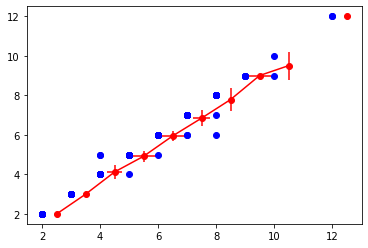

In [82]:
a_bins = [1, 2, 3.,  4.,  5.,6,7,8,9,10,11,12,13]
calculate_weighted_average_std(df, a_bins)
